In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [27]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [29]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [32]:
regressor = Sequential()


In [33]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [34]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [35]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [36]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [37]:
regressor.add(Dense(units = 1))


In [38]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [39]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 21s 336ms/step - loss: 0.0381
Epoch 2/100
38/38 [==============================] - 13s 337ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 13s 356ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 13s 338ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 12s 316ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 12s 316ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 13s 336ms/step - loss: 0.0041
Epoch 8/100
38/38 [==============================] - 12s 320ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 14s 357ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 14s 363ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 14s 373ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 15s 390ms/step - loss: 0.0045
E

38/38 [==============================] - 15s 392ms/step - loss: 0.0015
Epoch 99/100
38/38 [==============================] - 14s 376ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 18s 471ms/step - loss: 0.0014


In [40]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

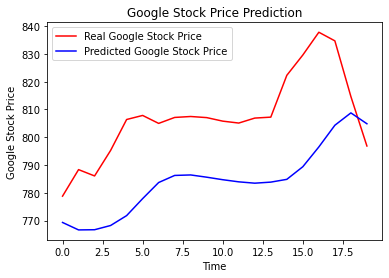

In [41]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
